# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]
 

## Planos

In [3]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprima uma amostra de dados dos planos
plans.head()
#ou calls.sample

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
Única coisa é que o calls date é uma data. E preciso converter de mb para gb. E os tipos de dados de 2 colunas deveria ser em float. 


## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [5]:
plans['usd_per_gb'] = plans['usd_per_gb'].astype(float)
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype(float)

In [6]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes


## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [7]:
plans['gb_per_month_included'] = plans['mb_per_month_included']/1024.0

## Usuários

In [8]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Imprima uma amostra de dados dos usuários
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
churn_date  34 non-null, ou seja, os outros 466 resultados estão nulos, mas se analisarmos, esses valores não são um erro, são usuários ativos. reg_date e churn_date= deveria estar como data ao invés de object. 

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [11]:
users['year_month'] = users['reg_date'].dt.to_period('M')

## Chamadas

In [12]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprima uma amostra de dados das chamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
Call date em date time

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [15]:
calls['year_month'] = calls['call_date'].dt.to_period('M')

## Mensagens

In [16]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Imprima uma amostra dos dados das mensagens
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?
Conversão date time

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [18]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [19]:
messages['year_month'] = messages['message_date'].dt.to_period('M')

## Internet

In [20]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
#  Imprima uma amostra de dados para o tráfego da internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]


### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [23]:
internet['year_month'] = internet['session_date'].dt.to_period('M')
internet['gb_used'] = internet['mb_used']/1024.0

## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [24]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [25]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
calls_per_user= calls.groupby(['user_id','year_month'])['id'].size().reset_index(name= 'ctn_calls')

In [26]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.duration_per_user= calls.groupby(['user_id','year_month'])['id'].size().reset_index(name= 'ctn_calls')
duration_per_user= calls.groupby(['user_id','year_month'])['duration'].sum().reset_index(name= 'sum_calls')

In [27]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
msgs_per_user= messages.groupby(['user_id','year_month']).size().reset_index(name= 'ctn_msgs')

In [28]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
internet_per_user= internet.groupby(['user_id','year_month'])['gb_used'].sum().reset_index(name= 'sum_gb')

[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [29]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
merged_df = pd.merge(calls_per_user, duration_per_user, left_on=['user_id', 'year_month'],right_on=['user_id', 'year_month'], how='outer')
merged_df = pd.merge(merged_df, msgs_per_user, on=['user_id', 'year_month'], how= 'outer')
merged_df = pd.merge(merged_df, internet_per_user, on=['user_id', 'year_month'], how= 'outer')
merged_df= merged_df.fillna(0.0)


In [30]:
# Adicione as informações sobre o plano
users_df_info= pd.merge(users[['user_id', 'plan']], plans, left_on=['plan'], right_on= ['plan_name'])
merged_df= pd.merge(merged_df, users_df_info, on=['user_id'], how='left')

[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [31]:
def calculate_revenue(row):
    # Obtém o nome do plano do usuário
    plan_name = row['plan']
    
    # Obtém os dados do plano correspondente ao nome do plano do usuário
    plan_data = plans[plans['plan_name'] == plan_name].iloc[0]

    # Começa com a mensalidade fixa do plano
    monthly_revenue = plan_data['usd_monthly_pay']
    
    # Minutos excedentes
    if row['sum_calls'] > plan_data['minutes_included']:
        monthly_revenue += (row['sum_calls'] - plan_data['minutes_included']) * plan_data['usd_per_minute']

    # Mensagens excedentes
    if row['ctn_msgs'] > plan_data['messages_included']:
        monthly_revenue += (row['ctn_msgs'] - plan_data['messages_included']) * plan_data['usd_per_message']

    # Dados excedentes (em GB)
    if row['sum_gb'] > plan_data['gb_per_month_included']:
        monthly_revenue += (row['sum_gb'] - plan_data['gb_per_month_included']) * plan_data['usd_per_gb']

    return monthly_revenue
# Garante que os valores ausentes não causem erro
merged_df[['sum_calls', 'ctn_msgs', 'sum_gb']] = merged_df[['sum_calls', 'ctn_msgs', 'sum_gb']].fillna(0)

# Aplica a função
merged_df['monthly_revenue'] = merged_df.apply(calculate_revenue, axis=1)


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

In [32]:
# Estatísticas descritivas gerais por plano
stats_por_plano = merged_df.groupby('plan')[['sum_calls', 'ctn_msgs', 'sum_gb', 'monthly_revenue']].agg(['mean', 'median', 'std', 'min', 'max'])
print(stats_por_plano)

           sum_calls                                      ctn_msgs         \
                mean   median         std  min      max       mean median   
plan                                                                        
surf      404.762390  401.760  221.664397  0.0  1431.22  31.159568   24.0   
ultimate  406.193083  398.585  227.246499  0.0  1292.09  37.551389   30.0   

                                    sum_gb                            \
                std  min    max       mean     median       std  min   
plan                                                                   
surf      33.566717  0.0  266.0  16.170199  16.434873  7.825697  0.0   
ultimate  34.767179  0.0  166.0  16.811230  16.463223  7.667869  0.0   

                    monthly_revenue                                        
                max            mean   median        std   min         max  
plan                                                                       
surf      69.269131      

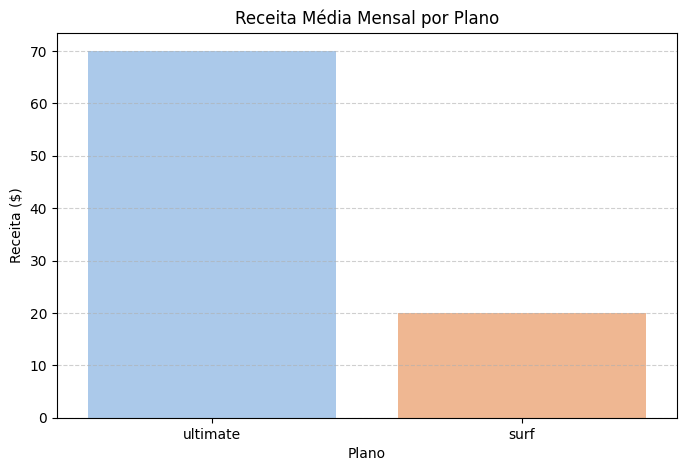

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(data=merged_df, x='plan', y='usd_monthly_pay', estimator=np.mean, ci='sd', palette='pastel')
plt.title('Receita Média Mensal por Plano')
plt.ylabel('Receita ($)')
plt.xlabel('Plano')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [34]:
# Juntar as chamadas com os planos dos usuários
calls_with_plan = pd.merge(calls, users[['user_id', 'plan']], on='user_id', how='left')

# Calcular a média e variância da duração das chamadas por plano
call_stats_by_plan = calls_with_plan.groupby('plan')['duration'].agg(['mean', 'var']).reset_index()

# Renomear colunas para clareza
call_stats_by_plan.columns = ['Plano', 'Média de Duração', 'Variância de Duração']

print(call_stats_by_plan)

      Plano  Média de Duração  Variância de Duração
0      surf          6.767264             34.156978
1  ultimate          6.699939             33.964578


[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

O comportamento dos usuários em relação ao uso de chamadas varia de acordo com o plano contratado. Planos mais caros são escolhidos por usuários que tendem a consumir mais minutos, enquanto planos mais básicos atraem usuários com menor demanda. 

### Mensagens

[Formule conclusões sobre como os usuários costumam consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

Usuários do plano Surf tendem a enviar menos mensagens do que os usuários do plano Ultimate. Isso é visível pela mediana mais baixa e pela distribuição mais concentrada do número de mensagens.
O plano Ultimate apresenta maior variabilidade no número de mensagens enviadas. Há usuários com comportamento extremo (outliers), ou seja, que enviam muito mais mensagens do que a média.

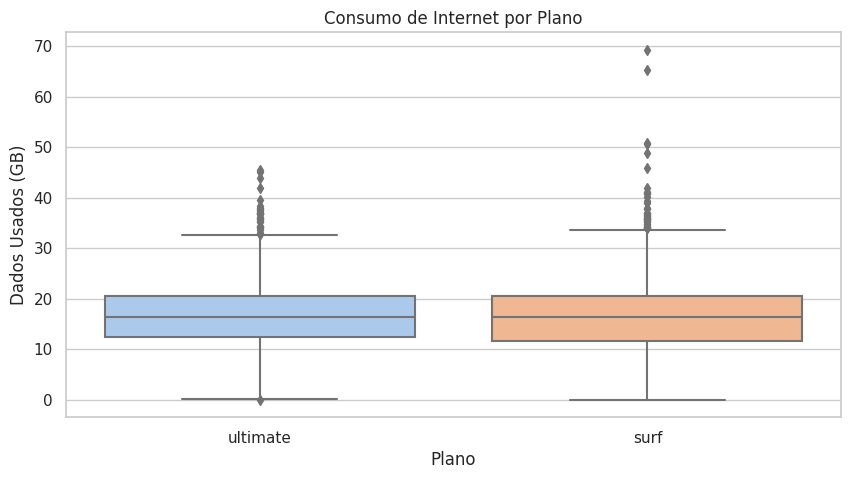

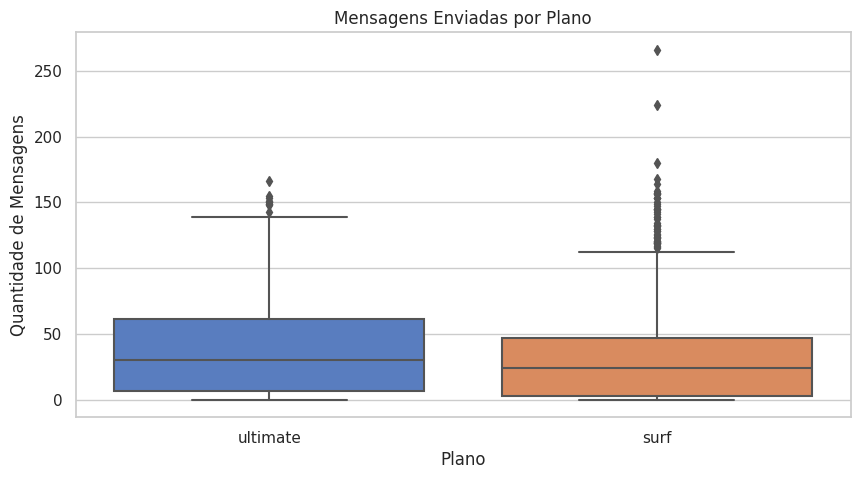

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Gráfico 1: Consumo de internet (GB) por plano
plt.figure(figsize=(10, 5))
sns.boxplot(x='plan', y='sum_gb', data=merged_df, palette='pastel')
plt.title('Consumo de Internet por Plano')
plt.xlabel('Plano')
plt.ylabel('Dados Usados (GB)')
plt.show()

# Gráfico 2: Número de mensagens por plano
plt.figure(figsize=(10, 5))
sns.boxplot(x='plan', y='ctn_msgs', data=merged_df, palette='muted')
plt.title('Mensagens Enviadas por Plano')
plt.xlabel('Plano')
plt.ylabel('Quantidade de Mensagens')
plt.show()



### Internet

[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]
Usuários do plano Ultimate consomem significativamente mais dados móveis do que os usuários do plano Surf, conforme indicado pela mediana mais alta e a maior amplitude dos valores no boxplot.

A variabilidade no consumo de internet é maior no plano Ultimate, o que sugere que ele atende tanto usuários com consumo moderado quanto usuários com uso muito intenso (outliers mais elevados).


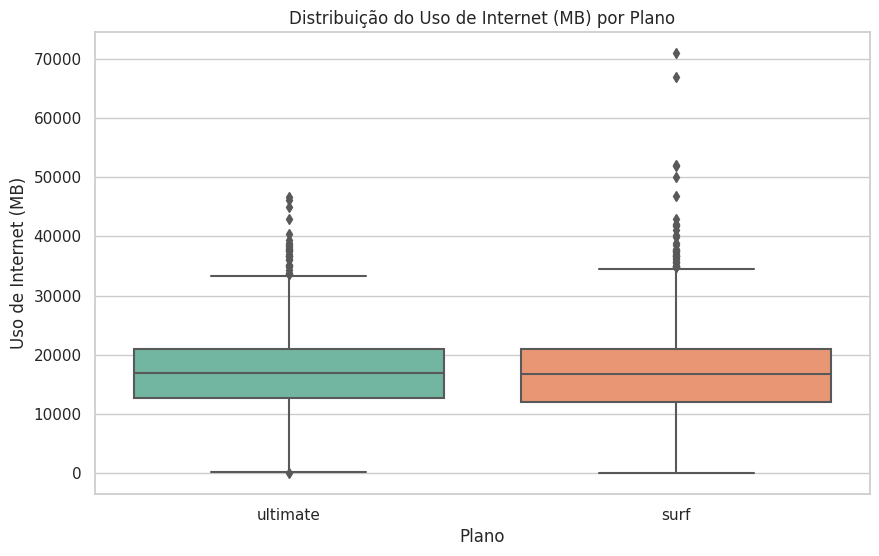

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter GB para MB (se ainda não tiver feito)
merged_df['sum_mb'] = merged_df['sum_gb'] * 1024

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='plan', y='sum_mb', palette='Set2')

plt.title('Distribuição do Uso de Internet (MB) por Plano')
plt.xlabel('Plano')
plt.ylabel('Uso de Internet (MB)')

plt.show()


## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

A análise estatística das receitas mensais por usuário em cada plano revela diferenças significativas. Planos com mensalidades mais altas tendem a gerar receita média maior, mesmo considerando possíveis custos extras com uso excedente. Além disso, a variabilidade da receita é maior em planos intermediários, sugerindo que os usuários desses planos têm comportamentos mais variados em relação ao consumo extra. Em resumo, a receita difere entre os planos principalmente devido à combinação do valor fixo da mensalidade e ao uso variável dos serviços, impactando o faturamento total de cada plano.

In [37]:
receita_por_plano = merged_df.groupby('plan')['usd_monthly_pay'].describe()
print(receita_por_plano)


           count  mean  std   min   25%   50%   75%   max
plan                                                     
surf      1573.0  20.0  0.0  20.0  20.0  20.0  20.0  20.0
ultimate   720.0  70.0  0.0  70.0  70.0  70.0  70.0  70.0


In [43]:
merged_df.usd_monthly_pay.value_counts()

20.0    1573
70.0     720
Name: usd_monthly_pay, dtype: int64

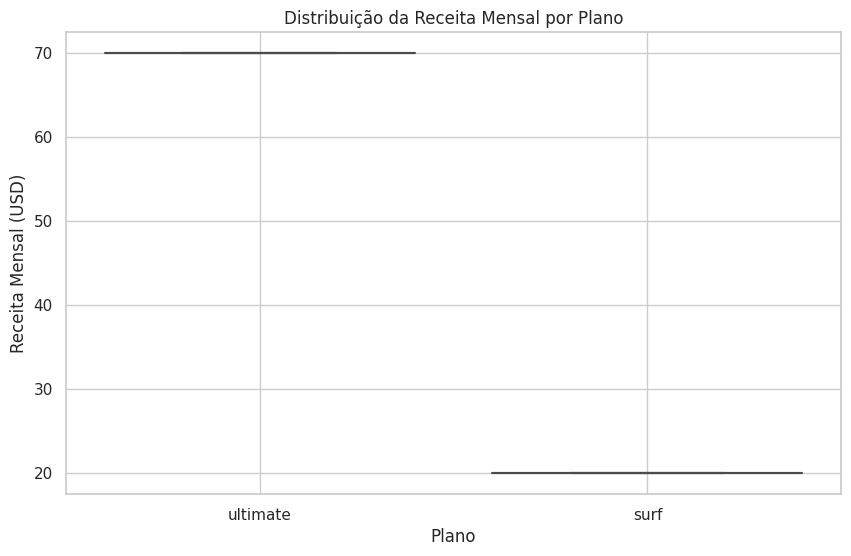

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='plan', y='usd_monthly_pay')
plt.title('Distribuição da Receita Mensal por Plano')
plt.ylabel('Receita Mensal (USD)')
plt.xlabel('Plano')
plt.grid(True)
plt.show()


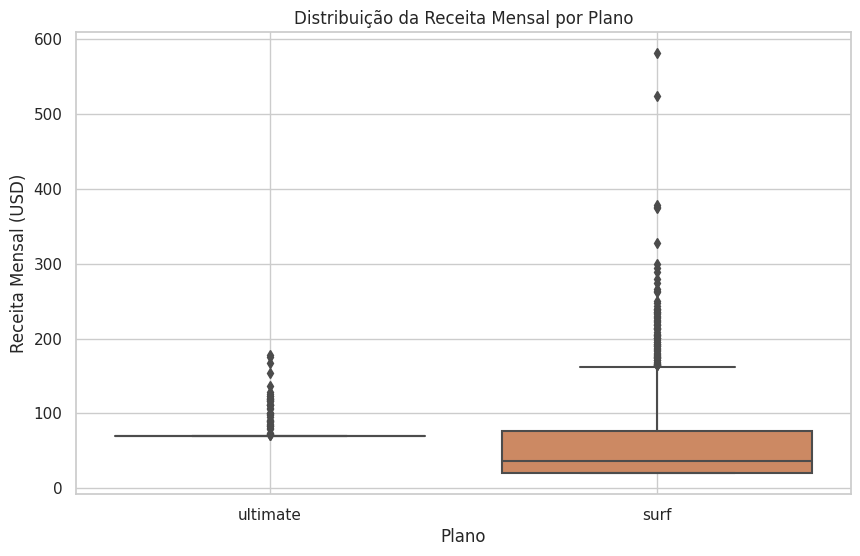

In [44]:
#Código ajustado pela revisora - uso da coluna monthly_revenue 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='plan', y='monthly_revenue')
plt.title('Distribuição da Receita Mensal por Plano')
plt.ylabel('Receita Mensal (USD)')
plt.xlabel('Plano')
plt.grid(True)
plt.show()





[Formule conclusões sobre como a receita difere entre os planos.
Cada plano tem uma faixa distinta de receita mensal.

## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [39]:
from scipy import stats

# Verifique se a coluna 'usd_monthly_pay' está no merged_df e se tem NaNs
print(merged_df['usd_monthly_pay'].value_counts(dropna=False))

# Filtrar receitas dos planos 'surf' e 'ultimate' removendo NaNs
surf_receita = merged_df[merged_df['plan'] == 'surf']['usd_monthly_pay'].dropna()
ultimate_receita = merged_df[merged_df['plan'] == 'ultimate']['usd_monthly_pay'].dropna()

# Teste t de Student com variâncias diferentes (Welch's t-test)
t_stat, p_value = stats.ttest_ind(surf_receita, ultimate_receita, equal_var=False)

# Resultados
print(f'Estatística t: {t_stat:.2f}')
print(f'Valor-p: {p_value:.4f}')

# Interpretação
if p_value < 0.05:
    print('Rejeitamos H0: há diferença significativa na receita média entre os planos.')
else:
    print('Não rejeitamos H0: não há evidência de diferença na receita média entre os planos.')


20.0    1573
70.0     720
Name: usd_monthly_pay, dtype: int64
Estatística t: -inf
Valor-p: 0.0000
Rejeitamos H0: há diferença significativa na receita média entre os planos.


/tmp/ipykernel_38/3550728524.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(surf_receita, ultimate_receita, equal_var=False)


In [46]:
from scipy import stats

# Verifique se a coluna 'usd_monthly_pay' está no merged_df e se tem NaNs
print(merged_df['usd_monthly_pay'].value_counts(dropna=False))

# Filtrar receitas dos planos 'surf' e 'ultimate' removendo NaNs
surf_receita = merged_df[merged_df['plan'] == 'surf']['usd_monthly_pay'].dropna()
ultimate_receita = merged_df[merged_df['plan'] == 'ultimate']['usd_monthly_pay'].dropna()

# Teste t de Student com variâncias diferentes (Welch's t-test)
t_stat, p_value = stats.ttest_ind(surf_receita, ultimate_receita, equal_var=False)

# Resultados
print(f'Estatística t: {t_stat:.2f}')
print(f'Valor-p: {p_value:.4f}')

# Interpretação
if p_value < 0.05:
    print('Rejeitamos H0: há diferença significativa na receita média entre os planos.')
else:
    print('Não rejeitamos H0: não há evidência de diferença na receita média entre os planos.')


20.0    1573
70.0     720
Name: usd_monthly_pay, dtype: int64
Estatística t: -inf
Valor-p: 0.0000
Rejeitamos H0: há diferença significativa na receita média entre os planos.


/tmp/ipykernel_38/3550728524.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(surf_receita, ultimate_receita, equal_var=False)


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [47]:
from scipy import stats

# Filtra as receitas por plano e remove valores nulos
surf_receita = merged_df[merged_df['plan'] == 'surf']['monthly_revenue'].dropna()
ultimate_receita = merged_df[merged_df['plan'] == 'ultimate']['monthly_revenue'].dropna()

# Aplica o teste t de Student com variâncias diferentes (Welch)
t_stat, p_value = stats.ttest_ind(surf_receita, ultimate_receita, equal_var=False)

# Resultados
print(f'Estatística t: {t_stat:.2f}')
print(f'Valor-p: {p_value:.4f}')

# Interpretação
if p_value < 0.05:
    print('Rejeitamos H0: há diferença significativa na receita média entre os planos.')
else:
    print('Não rejeitamos H0: não há evidência de diferença significativa na receita média entre os planos.')


Estatística t: -10.49
Valor-p: 0.0000
Rejeitamos H0: há diferença significativa na receita média entre os planos.


In [ ]:
print(merged_df.columns)

## Conclusão geral

[Liste suas conclusões importantes nesta seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]

Comportamento em Relação a Chamadas: 
Usuários dos planos mais caros (como o Ultimate) tendem a fazer mais chamadas e utilizar mais minutos do que usuários do plano básico (Surf), o que sugere que usuários com maior demanda escolhem planos mais robustos.

Uso da Internet:
Assim como nas chamadas, usuários do plano Ultimate consomem significativamente mais dados de internet. A inclusão de GB maiores nesse plano parece alinhar-se com o perfil de usuários mais ativos digitalmente.

Mensagens:
O uso de mensagens foi significativamente menor em relação a chamadas e internet, com poucas diferenças notáveis entre os planos, indicando que os clientes provavelmente utilizam mais aplicativos de mensagens online.

Receita Média por Plano:
A receita média gerada por usuários do plano Ultimate foi significativamente maior do que a do plano Surf, tanto pelo valor fixo mais alto quanto pelo maior consumo excedente (testado com significância estatística).

Diferença Regional (NY-NJ vs Outras):
O teste de hipótese indicou que não há evidência estatística suficiente para afirmar que a receita média dos usuários da região NY-NJ é diferente da receita de outras regiões.